In [1]:
import numpy as np
import matplotlib.pyplot as plt


from astropy.io import fits
from astropy.table import Table
from astropy import units as u
from astropy.io import ascii


# load 3d dust maps
# load halpha emission from MW (whampy)

In [2]:
# read dark patches table
darks = ascii.read('_data-sky/darks.txt')
darks.sort(keys="ra")
darks.info()

new_darks = ascii.read("_data-sky/EP_dobashi2011_nobrights.txt")

new_darks.rename_columns(names=["Dobashi2011_ID", "ra(J2000)", "dec(J2000)"], new_names=["ID", "ra", "dec"])
new_darks.sort(keys="ra")
new_darks["i"] = np.arange(len(new_darks))
new_darks.info()

<Table length=675>
 name  dtype 
----- -------
    i   int64
   ra float64
  dec float64
    l float64
    b float64
IMW80 float64
IMW40 float64
<Table length=132>
name  dtype 
---- -------
  ID float64
  ra float64
 dec float64
   i   int64


In [3]:
# read survey tables
lvm = ascii.read('_data-sky/survey.txt')
lvm.add_column(np.arctan(lvm["lunation"])*180/np.pi, name="moon_sun_sep")
lvm = lvm[lvm['ra']!=-999.0]
lvm.info()

<Table length=24758>
     name      dtype 
------------- -------
           JD float64
  observatory    str3
       target   str12
        group    str6
       tileid   int64
        index   int64
           ra float64
          dec float64
           pa float64
      airmass float64
     lunation float64
shadow_height float64
    moon_dist float64
          lst float64
      exptime float64
    totaltime float64
 moon_sun_sep float64


In [4]:
from datetime import datetime, timedelta
from lvmdrp.core import sky


# ra, dec = 121.75, -29.7
# ini_dt = datetime.fromisoformat("2012-07-17T21:12:14")
# fin_dt = ini_dt + timedelta(days=19)

# _, sky_comps = sky.get_sky_model(wmin=365, wmax=1040, wres=3000, observatory="lasilla", date=ini_dt.strftime("%Y-%m-%dT%H:%M:%S"))
# _, sky_comps_later = sky.get_sky_model(wmin=365, wmax=1040, wres=3000, observatory="lasilla", date=fin_dt.strftime("%Y-%m-%dT%H:%M:%S"))

# plt.figure(figsize=(20,5))
# plt.plot(sky_comps["lam"], sky_comps["flux"])
# plt.plot(sky_comps["lam"], sky_comps_later["flux"])

In [5]:
lvm.to_pandas().head()

,JD,observatory,target,group,tileid,index,ra,dec,pa,airmass,lunation,shadow_height,moon_dist,lst,exptime,totaltime,moon_sun_sep
0,2.459946e+06,LCO,ORION_SPARSE,ORI,1001657,186,93.776208,-3.297009,421.400873,1.523737,0.71776,505.568352,61.801455,3.320358,900.0,990.0,35.669273
1,2.459946e+06,LCO,ORION_SPARSE,ORI,1001639,168,91.841575,-4.346719,421.529843,1.379519,0.71776,668.395932,60.266359,3.596111,900.0,990.0,35.669273
2,2.459946e+06,LCO,ORION_SPARSE,ORI,1001631,160,91.782095,-6.536020,421.358540,1.285270,0.71776,839.559813,60.895707,3.871864,900.0,990.0,35.669273
3,2.459946e+06,LCO,ORION_SPARSE,ORI,1001610,139,89.775465,-9.780659,421.539241,1.181422,0.71776,972.351738,60.140608,4.147617,900.0,990.0,35.669273
4,2.459946e+06,LCO,ORION_SPARSE,ORI,1001625,154,91.729707,-8.728141,421.224920,1.170123,0.71776,1209.546510,61.575579,4.423370,900.0,990.0,35.669273


In [6]:
from astropy.time import Time


i = 0

# survey = lvm[lvm["target"] == "ORION_SPARSE"]
# sky_comps = {}
# for idx, row in survey.to_pandas().iterrows():
#     date = Time(row.JD, format="jd") - timedelta(days=5*365)

#     _, sky_comps[idx], pars = sky.get_sky_model(
#         wmin=365, wmax=1040, wres=3000,
#         observatory="lasilla", date=date.strftime("%Y-%m-%dT%H:%M:%S"),
#         ra=row.ra, dec=row.dec,
#         return_pars=True
#     )
#     # print(pars)
#     # if i == 1: break
#     # i += 1

In [7]:
lvm[lvm["target"] == "ORION_SPARSE"]

JD,observatory,target,group,tileid,index,ra,dec,pa,airmass,lunation,shadow_height,moon_dist,lst,exptime,totaltime,moon_sun_sep
float64,str3,str12,str6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2459945.555724437,LCO,ORION_SPARSE,ORI,1001657,186,93.77620790852316,-3.2970094148192874,421.40087324569686,1.5237373455265273,0.717759999932579,505.56835196372475,61.80145548670625,3.3203582763361434,900.0,990.0000000000001,35.669272578974464
2459945.56718277,LCO,ORION_SPARSE,ORI,1001639,168,91.84157496288847,-4.346719453574324,421.52984315768333,1.3795186511662731,0.717759999932579,668.3959321371212,60.2663590405647,3.5961111961553494,900.0,990.0000000000001,35.669272578974464
2459945.578641103,LCO,ORION_SPARSE,ORI,1001631,160,91.78209505427789,-6.536020238325764,421.3585403438204,1.2852699512417967,0.717759999932579,839.559812658969,60.89570737692009,3.8718641160055993,900.0,990.0000000000001,35.669272578974464
2459945.590099436,LCO,ORION_SPARSE,ORI,1001610,139,89.77546548509387,-9.780658947625739,421.5392405054998,1.181422137856117,0.717759999932579,972.3517377154984,60.140607743387605,4.147617035855849,900.0,990.0000000000001,35.669272578974464
2459945.6015577693,LCO,ORION_SPARSE,ORI,1001625,154,91.72970664006093,-8.728140886864505,421.2249197203671,1.1701232797084387,0.717759999932579,1209.546510488979,61.57557919448619,4.423369955675056,900.0,990.0000000000001,35.669272578974464
2459945.6130161025,LCO,ORION_SPARSE,ORI,1001666,195,93.84556088921427,-1.119512478537509,421.6837941645332,1.2311778128661433,0.717759999932579,1704.9377583619412,61.26488103630935,4.699122875525306,900.0,990.0000000000001,35.669272578974464
2459945.6244744356,LCO,ORION_SPARSE,ORI,1001649,178,93.71923797855645,-5.479301275813587,421.15576845139617,1.1507679698582693,0.717759999932579,1746.681864350054,62.39302272549221,4.974875795375556,900.0,990.0000000000001,35.669272578974464
2459945.6359327687,LCO,ORION_SPARSE,ORI,1001674,203,93.92909391254621,1.0524558462002438,422.0053631123282,1.1975068375388596,0.717759999932579,2326.401243718953,60.786382897261845,5.2506287152258055,900.0,990.0000000000001,35.669272578974464
2459945.647391102,LCO,ORION_SPARSE,ORI,1001604,133,89.71573675792988,-11.976890678668799,421.51928576536056,1.0525031651919692,0.717759999932579,1811.43054978132,60.90269439330531,5.526381635045012,900.0,990.0000000000001,35.669272578974464


In [8]:
darks

i,ra,dec,l,b,IMW80,IMW40
int64,float64,float64,float64,float64,float64,float64
18,0.3530911940469522,3.688345525566837,268.98962,-44.13989,0.24027997,1.1196669340133667
27,1.376982322258666,-2.2703066868087776,270.8799,-42.45003,0.20430438,1.0133291482925415
8,1.4268429954593171,-34.930023482640614,268.62976,-45.839947,0.15876262,0.8920636177062988
46,1.6469062298877675,-17.912117136593963,276.203,-44.990192,-0.19570889,1.224367380142212
54,2.427691812705812,-18.380029030357388,274.45212,-44.139984,0.21025282,1.0298329591751099
24,2.6179868760408564,-3.6172192115695103,273.77094,-43.2906,0.2273919,0.9142774343490601
1,2.650412155837834,-39.47509039484301,269.03006,-46.69001,-1.4840635,1.0377237796783447
3,2.666433457553926,-27.057658187151876,271.881,-46.690475,-0.15321775,1.1158636808395386
52,2.826034133547569,-26.092953757310298,277.18314,-44.140312,-0.05602245,1.2740144729614258


In [9]:
# MaNGA super sky: 

Text(0, 0.5, 'EBV (mag)')

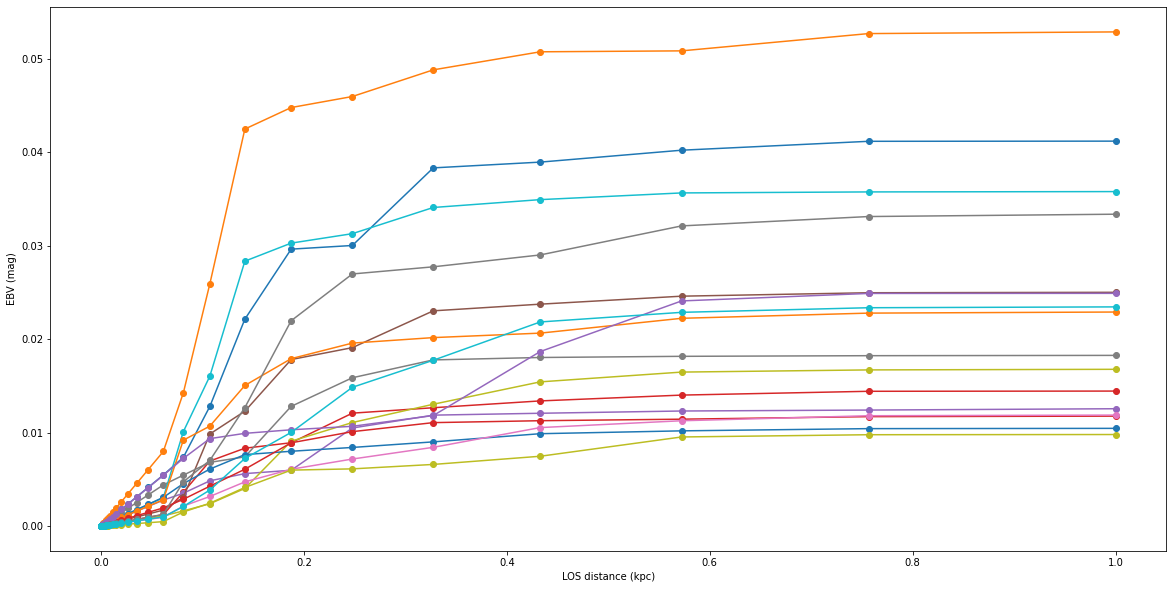

In [10]:
from dustmaps.bayestar import BayestarWebQuery
from astropy.coordinates import SkyCoord


bst = BayestarWebQuery(version="bayestar2015")
dist = np.logspace(np.log10(1e-12), np.log10(1), 100)
# plt.plot(dist, np.zeros_like(dist), "ok")

plt.figure(figsize=(20,10))
for idx, row in darks.to_pandas().head(20).iterrows():
    ebv = bst(SkyCoord(
        ra=row["ra"]*u.deg,
        dec=row["dec"]*u.deg,
        distance=dist*u.kpc,
    ), mode="median")

    plt.plot(dist, ebv, "o-")

plt.xlabel("LOS distance (kpc)")
plt.ylabel("EBV (mag)")
# use SK law to estimate a first order Halpha

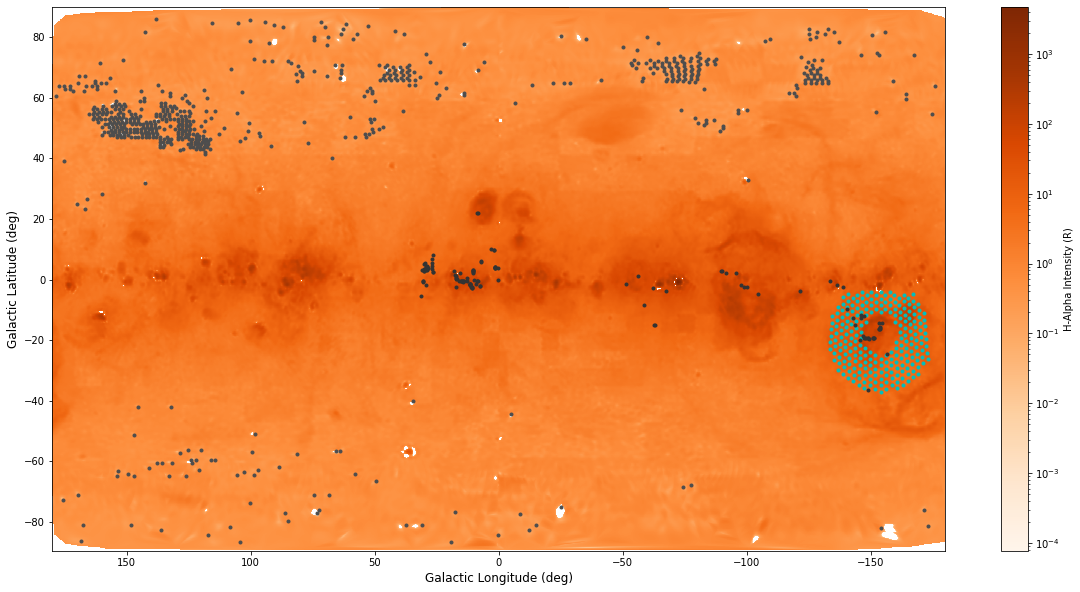

In [11]:
from whampy.skySurvey import SkySurvey


# u.add_enabled_units({"DEG": u.deg})

# Load Survey
wham = SkySurvey()
# Quick Sky Map
fig = wham.intensity_map(smooth=True, colorbar=True, cmap="Oranges", vmin=None, vmax=None, fig=plt.figure(figsize=(20,10)))
ax = plt.gca()

survey = lvm[lvm["target"] == "ORION_SPARSE"]

dark_coords = SkyCoord(darks["ra"], darks["dec"], unit="deg")
dark_l = dark_coords.galactic.l.wrap_at(180*u.deg)
dark_b = dark_coords.galactic.b.wrap_at(90*u.deg)

new_darks_coords = SkyCoord(new_darks["ra"], new_darks["dec"], unit="deg")
new_dark_l = new_darks_coords.galactic.l.wrap_at(180*u.deg)
new_dark_b = new_darks_coords.galactic.b.wrap_at(90*u.deg)

ori_coords = SkyCoord(survey["ra"]*u.deg, survey["dec"]*u.deg)
ori_l = ori_coords.galactic.l.wrap_at(180*u.deg).value
ori_b = ori_coords.galactic.b.wrap_at(90*u.deg).value

ax.plot(ori_l, ori_b, ".c")
ax.plot(dark_l, dark_b, ".", color="0.3")
ax.plot(new_dark_l, new_dark_b, ".", color="0.2")

# survey

In [133]:
from astropy.coordinates import EarthLocation, AltAz
from lvmsurveysim.utils import shadow_height_lib as sh
from astro import distance


# TODO: pass the JD to use the correct ephemeris
# cross-match science targets with dark patches
# in order to get the JD for each dark patch

calculator = sh.shadow_calc()
loc = EarthLocation(
    lat=calculator.observatory_topo.latitude.degrees*u.deg,
    lon=calculator.observatory_topo.longitude.degrees*u.deg,
    height=calculator.observatory_elevation
)


sky_ids, dists, shadow_heights, airmasses, alt, az, lst = [], [], [], [], [], [], []
for obs in survey:
    for dark in new_darks:
        dists.append(distance(obs['ra'], obs['dec'], dark['ra'], dark['dec']))
        sky_ids.append(dark["i"])
        
        calculator.update_time(jd=obs["JD"])
        calculator.set_coordinates(dark["ra"], dark["dec"])
        shadow_heights.append(calculator.get_heights()[0])

        sk = SkyCoord(ra=dark["ra"], dec=dark["dec"], unit="deg")
        time = Time(obs["JD"], format="jd", location=loc)
        eh = sk.transform_to(AltAz(obstime=time, location=loc))

        alt.append(eh.alt.value)
        az.append(eh.az.value)
        lst.append(time.sidereal_time("mean").value)
        airmasses.append(np.abs(eh.secz.value))

dists = np.asarray(dists)
sky_ids = np.asarray(sky_ids)
shadow_heights = np.asarray(shadow_heights)
alt = np.asarray(alt)
az = np.asarray(az)
lst = np.asarray(lst)
airmasses = np.asarray(airmasses)

In [146]:
sky_sci_table = Table()
sky_sci_table.add_column(sky_ids, name="sky_id")
sky_sci_table.add_column(np.repeat(np.arange(len(survey), dtype=int), len(new_darks)), name="sci_id")
sky_sci_table.add_column(dists, name="distance")
sky_sci_table.add_column(shadow_heights, name="shadow_heights")
sky_sci_table.add_column(alt, name="alt")
sky_sci_table.add_column(az, name="az")
sky_sci_table.add_column(lst, name="lst")
sky_sci_table.add_column(airmasses, name="airmass")
sky_sci_table.add_column((lst*u.hourangle - np.tile(new_darks["ra"], reps=len(survey))*u.deg).value, name="ha")
sky_sci_table

sky_id,sci_id,distance,shadow_heights,alt,az,lst,airmass,ha
int64,int64,float64,float64,float64,float64,float64,float64,float64
0,0,26.993539761973313,369.93391565096334,66.85341440112101,54.28497527891929,3.3209612685543726,1.0875449841036477,-1.263417416632295
1,0,17.05478756188975,420.650642897086,53.583454765954606,50.168904109229715,3.3209612685543726,1.242664546624111,-1.7918784536656287
2,0,10.11667985375285,440.2769042588954,49.616022516377605,59.907865215897,3.3209612685543726,1.3128191828357914,-2.2632530832989617
3,0,10.133410144919246,438.61752188770157,49.834026483737425,60.427427962384016,3.3209612685543726,1.3085935614706836,-2.2667662684856293
4,0,10.107231941341297,439.0892840600215,49.7671301841483,60.32691079429772,3.3209612685543726,1.309885316262841,-2.2673659536656285
5,0,10.011484740239364,440.1207484669775,49.611790484274685,60.20936107427497,3.3209612685543726,1.312901671620849,-2.2719761573722947
6,0,10.125487901910024,432.84545370771855,50.52413033439471,62.95059654190285,3.3209612685543726,1.2955173516415563,-2.2997418055189613
7,0,9.867983499400806,433.98237636022907,50.29919891114316,63.17685836088578,3.3209612685543726,1.2997299016519106,-2.3175975092256285
8,0,9.759369453052141,434.2714190115662,50.22399436635213,63.37754412864957,3.3209612685543726,1.3011489426982104,-2.3268974721856286


Text(0.5, 0, 'H.A. (hour)')

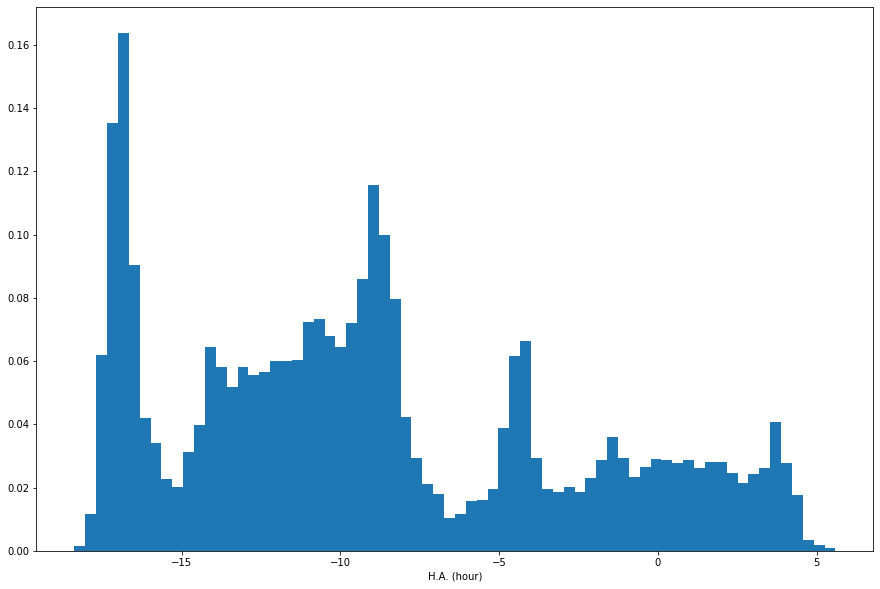

In [147]:
plt.figure(figsize=(15,10))
plt.hist(sky_sci_table["ha"], bins=70, density=True)
plt.xlabel("H.A. (hour)")

In [154]:
mask = np.abs(sky_sci_table["ha"]) <= 3.5
mask &= sky_sci_table["airmass"] < 1.3
mask &= (survey["shadow_height"].min() <= sky_sci_table["shadow_heights"]) & (sky_sci_table["shadow_heights"] <= survey["shadow_height"].max())


sky_sci_match = sky_sci_table[mask]
sky_sci_match

sky_id,sci_id,distance,shadow_heights,alt,az,lst,airmass,ha
int64,int64,float64,float64,float64,float64,float64,float64,float64
1,1,15.147776564315736,577.0862009548568,56.248511611666856,44.67622786625379,3.596714188448762,1.2027106502797467,-1.5161255337712394
2,1,8.071760139456018,605.1411765600358,52.67443711653688,55.501143760764286,3.596714188448762,1.2575404703951416,-1.9875001634045724
3,1,8.054750940158803,602.5108251470051,52.91009008158334,56.036505574570135,3.596714188448762,1.2536196001803215,-1.99101334859124
4,1,8.035843092800018,603.2468264753742,52.83983398131141,55.93506578596192,3.596714188448762,1.2547837636144628,-1.9916130337712392
5,1,7.952520568131681,604.8322524041831,52.68066323672846,55.82325556582601,3.596714188448762,1.2574362889388617,-1.9962232374779054
6,1,7.94789233892828,593.2421416652767,53.68276822644995,58.676781682282495,3.596714188448762,1.2410794357260209,-2.023988885624572
7,1,7.6882175132662045,594.8970930126032,53.465293420056504,58.938169438848035,3.596714188448762,1.2445606433950638,-2.041844589331239
8,1,7.576543338919186,595.2845976718891,53.39650044233136,59.15946176884317,3.596714188448762,1.2456696521309811,-2.0511445522912393
9,1,7.5397777568481175,591.4712278099538,53.638875722798176,60.77546998610261,3.596714188448762,1.2417790311587096,-2.080551200437906


Text(0.5, 0, 'H.A. (hour)')

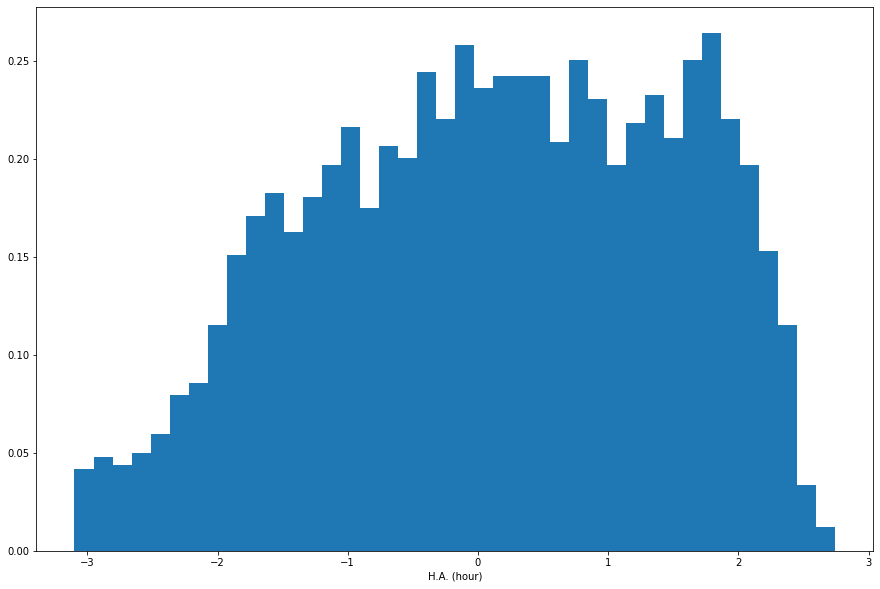

In [156]:
plt.figure(figsize=(15,10))
plt.hist(sky_sci_match["ha"], bins=40, density=True)
plt.xlabel("H.A. (hour)")

In [157]:
from tqdm import tqdm


sky_sci = {}
for idx, row in tqdm(enumerate(survey), total=len(survey), desc="simulating sky for science pointings"):
    date = Time(row["JD"], format="jd") - timedelta(days=5*365)

    _, sky_sci[idx] = sky.get_sky_model(
        wmin=365, wmax=1040, wres=3000,
        observatory="lasilla", date=date.strftime("%Y-%m-%dT%H:%M:%S"),
        ra=row["ra"], dec=row["dec"],
        return_pars=False
    )

simulating sky for science pointings: 100%|██████████| 227/227 [31:25<00:00,  8.31s/it]


In [168]:
sci_i = 1
darks_i = sky_sci_match[sky_sci_match["sci_id"]==sci_i]["sky_id"].value


sky_sky = {}
for idx in tqdm(darks_i, total=len(darks_i), desc="simulating sky for sky pointings"):
    date = Time(survey["JD"][sci_i], format="jd") - timedelta(days=5*365)

    _, sky_sky[idx] = sky.get_sky_model(
        wmin=365, wmax=1040, wres=3000,
        observatory="lasilla", date=date.strftime("%Y-%m-%dT%H:%M:%S"),
        ra=new_darks["ra"][idx], dec=new_darks["dec"][idx],
        return_pars=False
    )

100%|██████████| 13/13 [01:55<00:00,  8.87s/it]


In [169]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim(3600, 10000)
ax.set_ylim(-1, 1)

for idx in sky_sky.keys():
    joint_residuals = (sky_sky[idx]["flux"]-sky_sci[sci_i]["flux"]) / sky_sky[sci_i]["flux"]

    ax.plot(sky_sky[idx]["lam"], joint_residuals, color="k", lw=1.5, alpha=0.5)

lam,flux,dflux1,dflux2,trans,dtrans1,dtrans2,flux_sml,flux_ssl,flux_zl,flux_tie,flux_tme,flux_ael,flux_arc,trans_ma,trans_o3,trans_rs,trans_ms
Angstrom,arcsec2 / (m2 s),,,,,,,,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
3650.0,4767.189816295276,25.208007129578075,25.208007129578075,0.583469446179165,0.0,0.0,4665.653729492962,8.9450609406223,24.121858718298384,0.0,0.0,10.877153615187433,57.59201352820553,0.9999687656988284,0.9996303333930143,0.6174891618665244,0.9452853308664295
3651.0,4825.321608752618,24.85872764473478,24.85872764473478,0.5838105033088554,0.0,0.0,4729.664504961127,8.94920491515485,24.452331428632686,0.0,0.0,4.6617489849516085,57.593818462752154,1.0,0.9996303333930143,0.6178308065254992,0.9452853308664295
3652.0,4884.831253456663,24.75370417437096,24.75370417437096,0.5841330470713627,0.0,0.0,4793.501969708978,8.95306546695916,24.78239379463165,0.0,0.0,0.0,57.593824486094874,1.0,0.9996303333930143,0.6181721458330316,0.9452853308664295
3653.0,4949.067165570217,24.72069226433673,24.72069226433673,0.5844553024369736,0.0,0.0,4857.403609819338,8.956926018763475,25.112799231382947,0.0,0.0,0.0,57.59383050073199,1.0,0.9996303333930143,0.6185131799379581,0.9452853308664295
3654.0,5014.302209801586,24.689900321057333,24.689900321057333,0.5848298541675282,0.0,0.0,4922.295754722356,8.961603944139702,25.445835647955125,0.0,0.0,0.0,57.5990154871351,1.0,0.9997202226289862,0.6188539089895884,0.9452853308664295
3655.0,5079.648370181214,24.659092947604623,24.659092947604623,0.5852039505985716,0.0,0.0,4987.298648097763,8.966279077301447,25.77926469163838,0.0,0.0,0.0,57.60417831451038,0.9999885017489192,0.9998212235880287,0.6191943331377051,0.9452853308664295
3656.0,5144.356199548236,24.626443194380485,24.626443194380485,0.5855341517888136,0.0,0.0,5051.669728923127,8.970276348234227,26.11114889978329,0.0,0.0,0.0,57.60504537709169,0.9999478912883096,0.9998767749352587,0.6195344525325598,0.9452853308664295
3657.0,5182.145040241917,24.593479766585588,24.593479766585588,0.585856626227401,0.0,0.0,5089.260211695004,8.974157998424385,26.30549049877187,0.0,0.0,0.0,57.60518004971639,0.9999501252033366,0.9998767749352587,0.6198742673248699,0.9452853308664295


In [ ]:
# run simulations for sky module as close as possible to the DRP (actual sky module)
# transform simulations to counts
# feed them to the sky module and quantify the effects of interpolation and variability effects
# 